# TP 4:  

### import libraries 

In [1]:
import time
import Hawkes                      as hk
import numpy                       as np
import matplotlib.pyplot           as plt
import pandas                      as pd
from   scipy.stats                 import linregress,norm


plt.style.use('ggplot')
mu = 1.2 # Lambda_0

In [2]:
def simulate_homogeneous_Poison_with_order_statisctis(mu,T):
    n = np.random.poisson(lam=mu*T)
    jump_time = np.random.uniform(low=0,high=T,size=n)
    jump_time = np.sort(jump_time)
    return(jump_time)

def Jump_process_construction(jump_time):
    N = np.ones_like(jump_time)
    N[0] = 0
    N = N.cumsum()
    return(N)

def get_differences(lst):
    differences = []
    for i in range(len(lst) - 1):
        differences.append(lst[i+1] - lst[i])
    return differences
    
def simulate_none_homogeneous_Poison(kernal,T):
    mu = kernal(0)
    jump_time = simulate_homogeneous_Poison_with_order_statisctis(mu=mu,T=T)
    lamda_jump = np.array([kernal(t)/mu for t in jump_time])
    u = np.random.uniform(low=0,high=1,size=len(lamda_jump))
    return(jump_time[lamda_jump>=u])

def simulate_hawkes_process(mu,kernal,T):
    t = 0
    jump_times   = [0]
    lamda_t    = mu
    lamda_star = mu
    list_lamda_t = [mu]
    list_lamda_star = [mu]
    times   = [0]
    while t<T:
        s = -np.log(np.random.uniform())/lamda_star 
        t += s 
        if t>T:
            return(jump_times,list_lamda_star,list_lamda_t,times)
        if len(jump_times)>1:
            lamda_t = mu
            for i in range(1,len(jump_times)):
                lamda_t += kernal(t-jump_times[i])
        d = np.random.uniform()
        if d <= lamda_t/lamda_star:
           jump_times.append(t)
           lamda_star  = lamda_t + kernal(0)
        else:
            lamda_star = lamda_t
        times.append(t)
        list_lamda_t.append(lamda_t)
        list_lamda_star.append(lamda_star)
    return(jump_times,list_lamda_star,list_lamda_t,times)

def exponential_kernal(t,alphas=[3/4],betas=[0.8]):
    assert len(alphas)==len(betas),"Betas and Alphas should  have the same length"
    alphas = np.array(alphas)
    betas = np.array(betas)
    if not np.sum(alphas)<1:
        print('You model is not stable')

    sum = np.sum(alphas*betas*np.exp(-betas*t))
    return(sum)

def Jump_process_construction(jump_time):
    N = np.ones_like(jump_time)
    N[0] = 0
    N = N.cumsum()
    return(N)

def plot_intensity(jump_times,lamda_t_plus,lamda_t_moins):
    x = []
    y = []

    for i in range(len(jump_times)):
        x.append(jump_times[i])
        y.append(lamda_t_moins[i])

        if i < len(jump_times) - 1:
            x.append(jump_times[i])
            y.append(lamda_t_plus[i])

    x.append(jump_times[-1])
    y.append(lamda_t_plus[-1])
    
    fig, ax = plt.subplots(figsize=(16,6))
    fig.suptitle(r'Intensity of Hawkes Proccess simulation')
    ax.step(jump_times,lamda_t_plus,label=r'$\lambda^*$',where='post',linestyle='--',color='g') #
    ax.plot(x,y,label=r'$\lambda_t$',linestyle='-',color='r')
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'Intensity')
    ax.legend()

    plt.show()

def simulate_none_homogeneous_Poison(kernal,T):
    mu = kernal(0)
    jump_time = simulate_homogeneous_Poison_with_order_statisctis(mu=mu,T=T)
    lamda_jump = np.array([kernal(t)/mu for t in jump_time])
    u = np.random.uniform(low=0,high=1,size=len(lamda_jump))
    return(jump_time[lamda_jump>=u])

def simulate_hawkes_process_with_branching(mu,kernal,T):
    jump_time = np.array([])
    current_times = np.array([])
    current_times = np.concatenate((current_times,simulate_homogeneous_Poison_with_order_statisctis(mu,T)))
    jump_time = current_times.copy()
    while len(current_times)>0:
        t_0   = current_times[0]
        current_times = np.delete(current_times, 0)
        T_0 = T - t_0
        current_times = np.concatenate((current_times,t_0 + simulate_none_homogeneous_Poison(kernal,T_0)))
        jump_time = np.concatenate((jump_time,t_0 + simulate_none_homogeneous_Poison(kernal,T_0)))
    jump_time = np.sort(jump_time)
    return jump_time

def time_realization(simulation_function, T):
    start_time = time.time()
    simulation_function(T)
    end_time = time.time()
    return end_time - start_time

def average_time_for_T(simulation_function, Number_simulation,T):
    times = []
    for _ in range(Number_simulation):
        realization_time = time_realization(simulation_function, T)
        times.append(realization_time)
    return np.mean(times),np.std(times)

def simulate_hawkes(model,T):
    itv = [0,T]
    jump_time = model.simulate(itv)
    return(jump_time)


### Question I

#### 1. Simulation.

Write your own function that simulates one path of a Hawkes process with a generic decreasing kernel using the thinning algorithm.
</br>*Input*: constant baseline intensity, kernel function, horizon.
</br>*Output*: time series of events

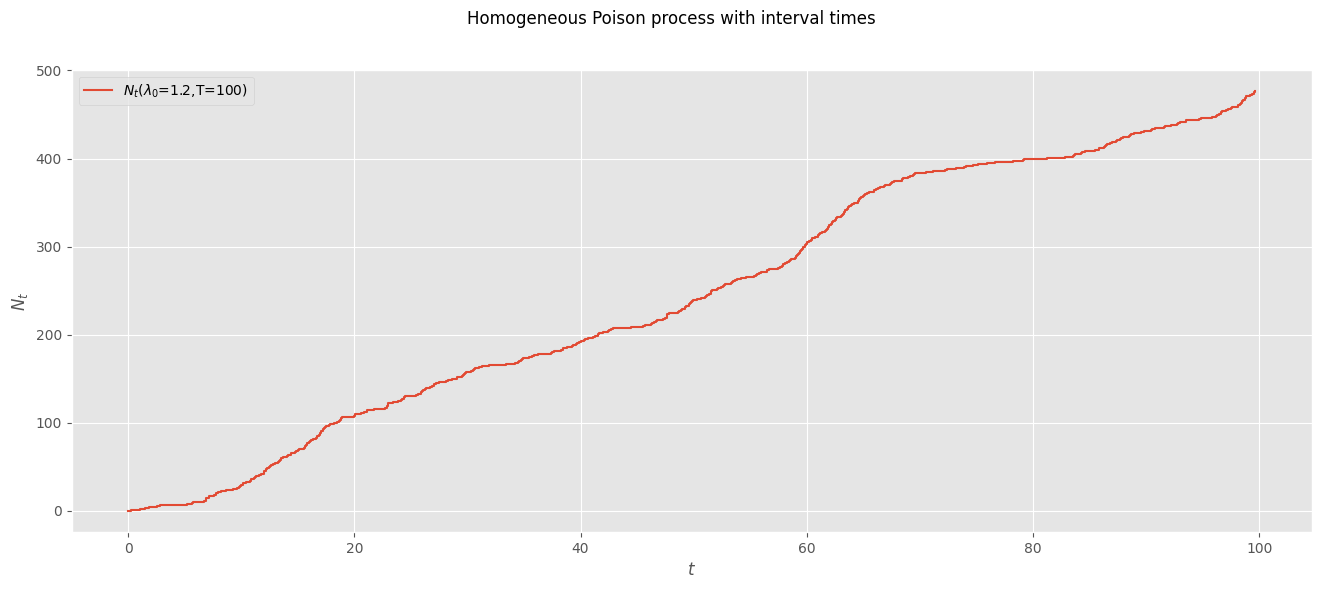

In [3]:
T = 100

fig, ax = plt.subplots(figsize=(16,6))
fig.suptitle(r'Homogeneous Poison process with interval times')
kernel_function = lambda t: exponential_kernal(t,alphas=[3/4],betas=[0.8])
jump_times,lamda_star,lamda_t,times= simulate_hawkes_process(mu=mu,kernal=kernel_function,T=T)
jump_value = Jump_process_construction(jump_times)
ax.step(jump_times,jump_value,label=r'$N_t$($\lambda_0$='+f'{mu}'+',T='+f'{T}'+')',where='post')

ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$N_t$')
ax.legend()

plt.show()

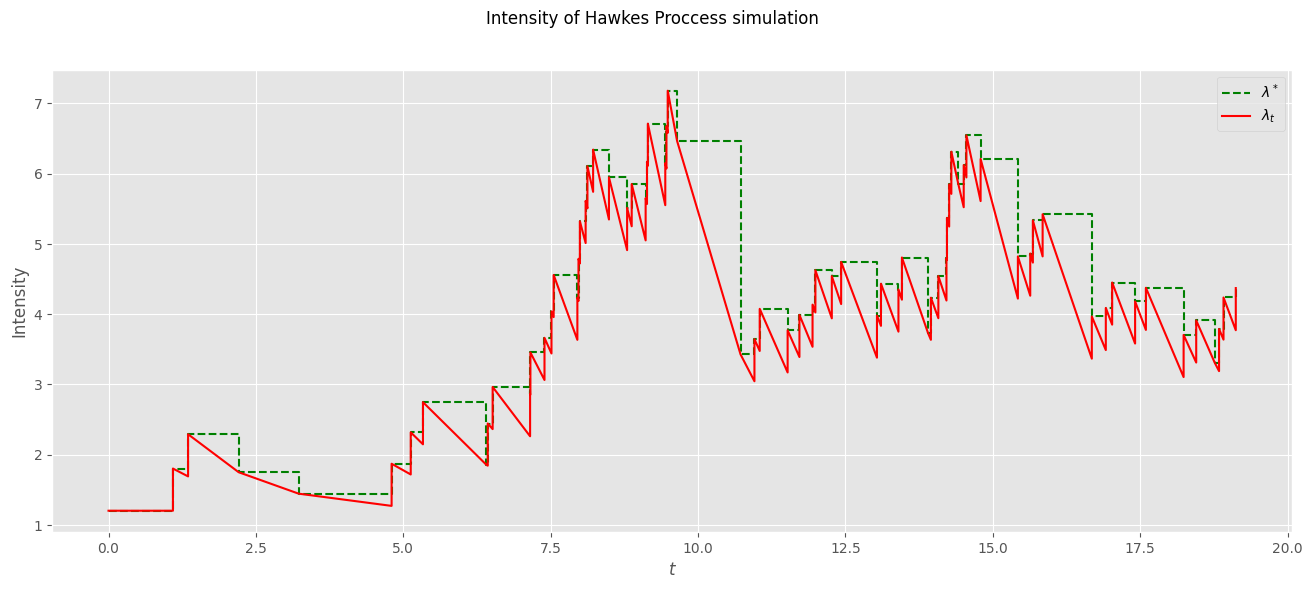

In [4]:
T = 20

kernel_function = lambda t: exponential_kernal(t,alphas=[3/4],betas=[0.8])
jump_times,lamda_star,lamda_t,times = simulate_hawkes_process(mu=mu,kernal=kernel_function,T=T)

plot_intensity(times,lamda_star,lamda_t)

#### 2. Sanity check 

Choose some values to define a stable Hawkes process with a single exponential kernel. Simulate a realization of this Hawkes process using your own code.Check that the order of magnitude of the number of events in the sample is the one expected.

*The average number of points of a Hawkes process* on a time interval of length **T** is in a stationary regime $\frac{\lambda_0 T}{1-||v||_1}$

in the case of a stable Hawkes process with a single exponential kernel, *The average number of points of a Hawkes process* = $\frac{\lambda_0 T}{1-\frac{\alpha}{\beta}}$

For $\lambda_0=1.2$,$\beta=0.8$,$\alpha=0.6$, then  *The average number of points of a Hawkes process* $=f(T) = 4.8T $

In [5]:
List_T = np.array([10,25,50,75,100,125,150])
N = 10 #Number of simulatrion per time step
Average_number_of_points = []
for T in List_T:
    n = 0
    for _ in range(N):
        jump_times,lamda_star,lamda_t,times = simulate_hawkes_process(mu=mu,kernal=exponential_kernal,T=T)
        n += len(jump_times)-1
    Average_number_of_points.append(n/N)
Average_number_of_points = np.array(Average_number_of_points)

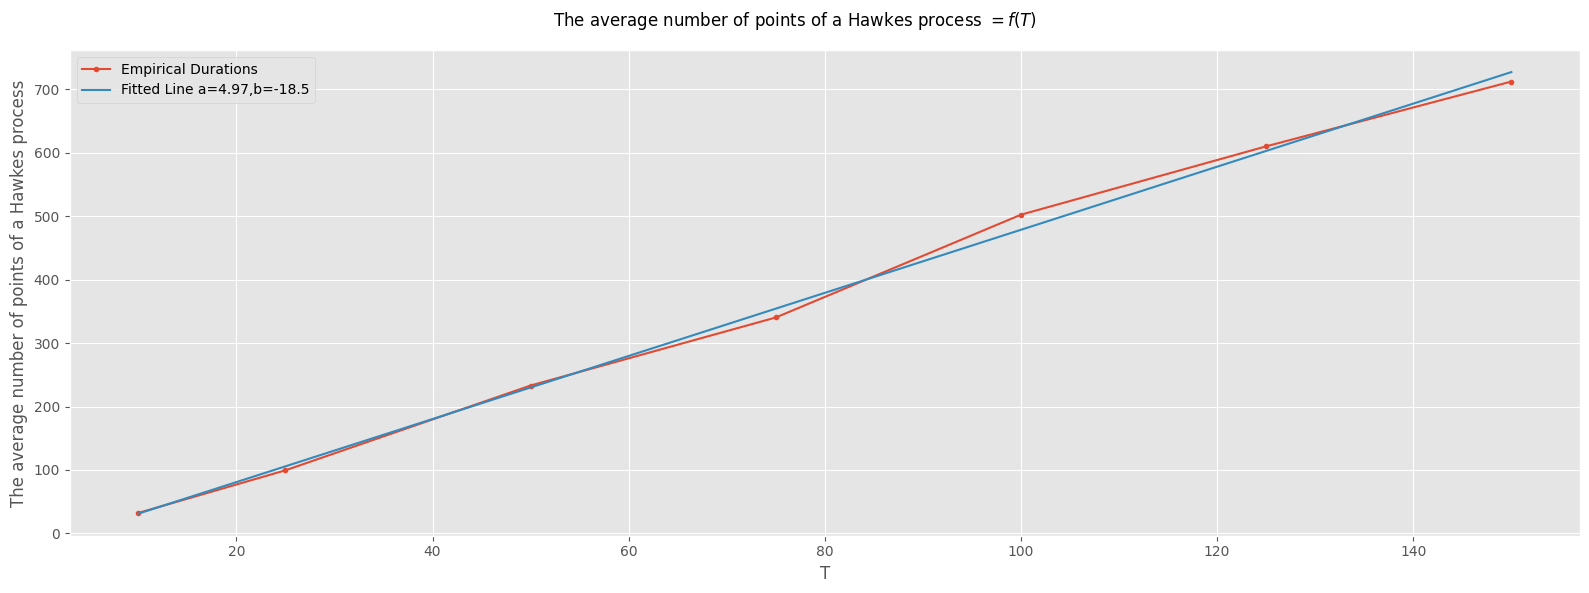

In [6]:
slope, intercept, r_value, p_value, std_err = linregress(List_T, Average_number_of_points)
y_fit = intercept + slope * List_T

fig, ax = plt.subplots(figsize=(16,6))
fig.suptitle(r'The average number of points of a Hawkes process $=f(T)$')

ax.plot(List_T, Average_number_of_points, marker='.', label='Empirical Durations')
ax.plot(List_T, y_fit, label=f'Fitted Line a={slope:.2f},b={intercept:.1f}')
ax.set_xlabel(r'T')
ax.set_ylabel(r'The average number of points of a Hawkes process')
ax.legend()

plt.tight_layout()
plt.show()

#### 3. Convergence of MLE estimates.

Choose some values to define a stable Hawkes process with a single exponential kernel. For a given T, simulate multiple (e.g., 25) realizations ofthis Hawkes process using your own code. Using the external library, show that 
for each parameter the MLE estimates converge towards the true values when T increases. For each parameter estimate the order of convergence in T. Comment.


We will simulate a stable Hawkes process with a single exponential kernel, using the following parameters : $\lambda_0=1.2$, $\beta=2$, $\alpha=0.5$ and we will do T = 100  in order to train the model on those simulations.

Notice that for in the library `Hawkes` the parameter $\alpha$ is defined as $\frac{\alpha}{\beta}$ 

In [7]:
List_T = np.array([10,50,100,200,300,400,500,600,700,800,900,1000])
alpha = 0.95
q = norm.ppf(alpha, loc=0, scale=1)
mean = {'mu':[],'alpha':[],'beta':[],}
min = {'mu':[],'alpha':[],'beta':[],}
max = {'mu':[],'alpha':[],'beta':[],}
model = hk.estimator()
model.set_kernel('exp')
model.set_baseline('const')
kernel_function = lambda t: exponential_kernal(t,alphas=[0.5/2],betas=[2])

Jumps = []
for _ in range(25):
    jump_time,lamda_star,lamda_t,times = simulate_hawkes_process(mu=mu,kernal=kernel_function,T=List_T[-1])
    jump_time = np.array(jump_time)
    Jumps.append(jump_time)

for T in List_T:
    itv = [0,T]
    parameter = {'mu':[],'alpha':[],'beta':[],}

    for i in range(25):
        model.fit(Jumps[i][Jumps[i]<T][1:],itv)
        for key in parameter.keys():
            parameter[key].append(model.parameter[key])

    for key in parameter.keys():
        parameter[key] = np.array(parameter[key])
        m = np.mean(parameter[key])
        s = np.std(parameter[key])
        mean[key].append(m)
        max[key].append(m + (q*s)/np.sqrt(25))
        min[key].append(m - (q*s)/np.sqrt(25))



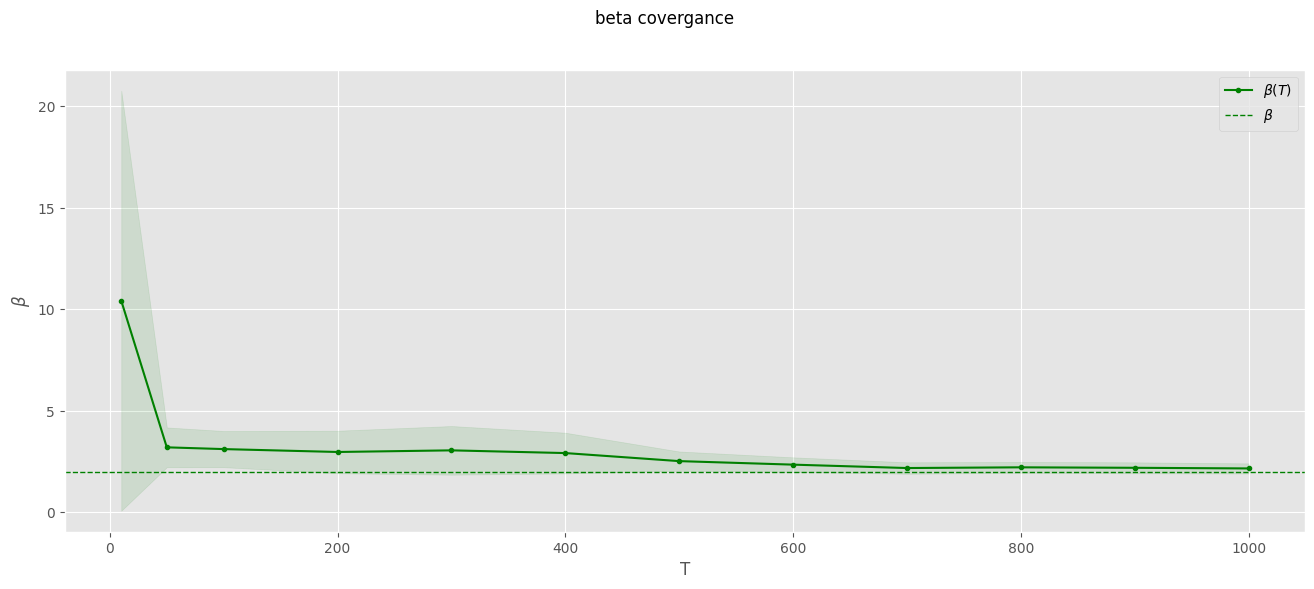

In [8]:
fig, ax = plt.subplots(figsize=(16,6))
fig.suptitle(r'beta covergance')

ax.plot(List_T, mean['beta'], marker='.', label=r'$\beta(T)$', color='g')
ax.fill_between(List_T, max['beta'], min['beta'], alpha=0.1, color='g')
ax.axhline(y=2,label=r'$\beta$',linewidth=1, color='g',linestyle='--')
ax.set_xlabel(r'T')
ax.set_ylabel(r'$\beta$')
ax.legend()

plt.show()

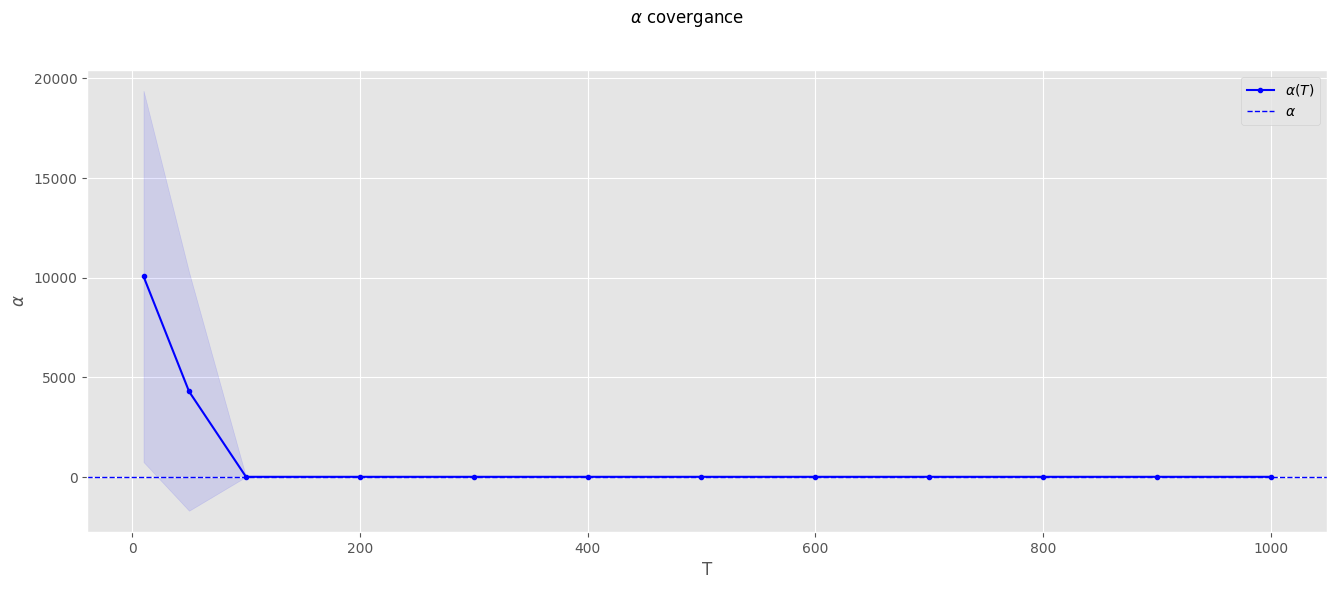

In [9]:
fig, ax = plt.subplots(figsize=(16,6))
fig.suptitle(r'$\alpha$ covergance')


ax.plot(List_T, mean['alpha'], marker='.', label=r'$\alpha(T)$', color='b')
ax.fill_between(List_T, max['alpha'], min['alpha'], alpha=0.1, color='b')
ax.axhline(y=0.5/2,label=r'$\alpha$',linewidth=1, color='b',linestyle='--')

ax.set_xlabel(r'T')
ax.set_ylabel(r'$\alpha$')
ax.legend()

plt.show()

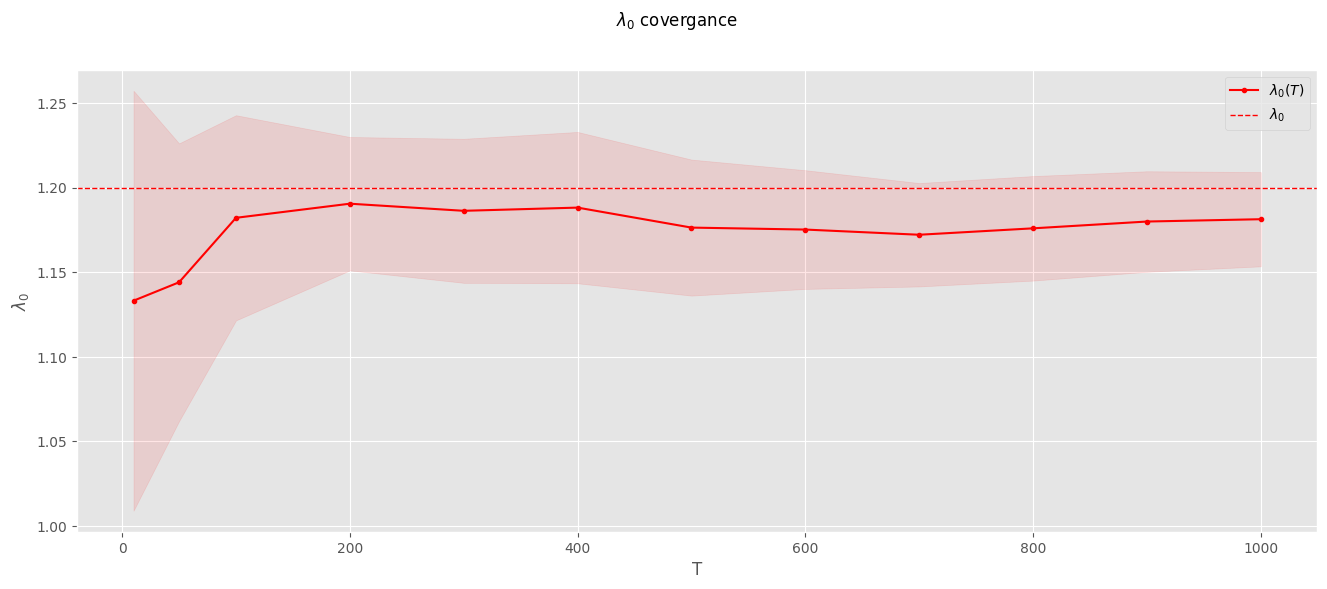

In [10]:
fig, ax = plt.subplots(figsize=(16,6))
fig.suptitle(r'$\lambda_0$ covergance')

ax.plot(List_T, mean['mu'], marker='.', label=r'$\lambda_0(T)$', color='r')
ax.fill_between(List_T, max['mu'], min['mu'], alpha=0.1, color='r')
ax.axhline(y=1.2,label=r'$\lambda_0$',linewidth=1, color='r',linestyle='--')

ax.set_xlabel(r'T')
ax.set_ylabel(r'$\lambda_0$')
ax.legend()

plt.show()

#### 4. Simulation branching algorithm 

Same as Question 1 but using the branching algorithm. Show that your implementation is correct

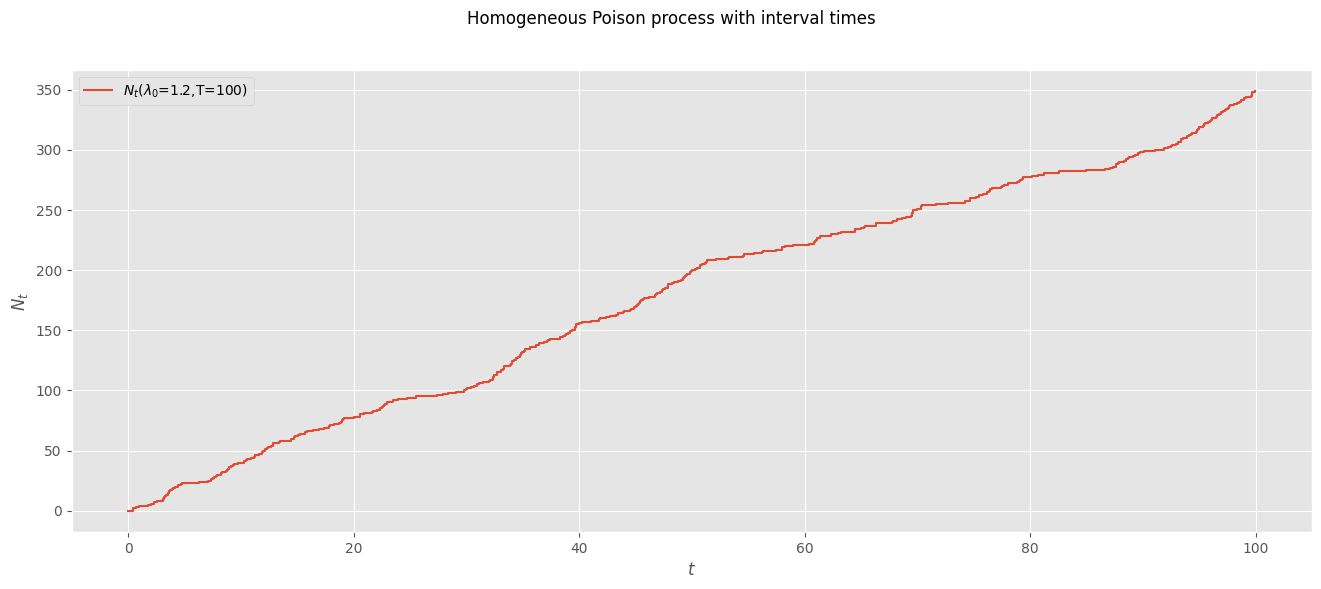

In [11]:
T = 100

fig, ax = plt.subplots(figsize=(16,6))
fig.suptitle(r'Homogeneous Poison process with interval times')
kernel_function = lambda t: exponential_kernal(t,alphas=[3/4],betas=[0.8])
jump_times = simulate_hawkes_process_with_branching(mu,kernel_function,T)
jump_times = np.concatenate(([0],jump_times))
jump_value = Jump_process_construction(jump_times)
ax.step(jump_times,jump_value,label=r'$N_t$($\lambda_0$='+f'{mu}'+',T='+f'{T}'+')',where='post')

ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$N_t$')
ax.legend()

plt.show()

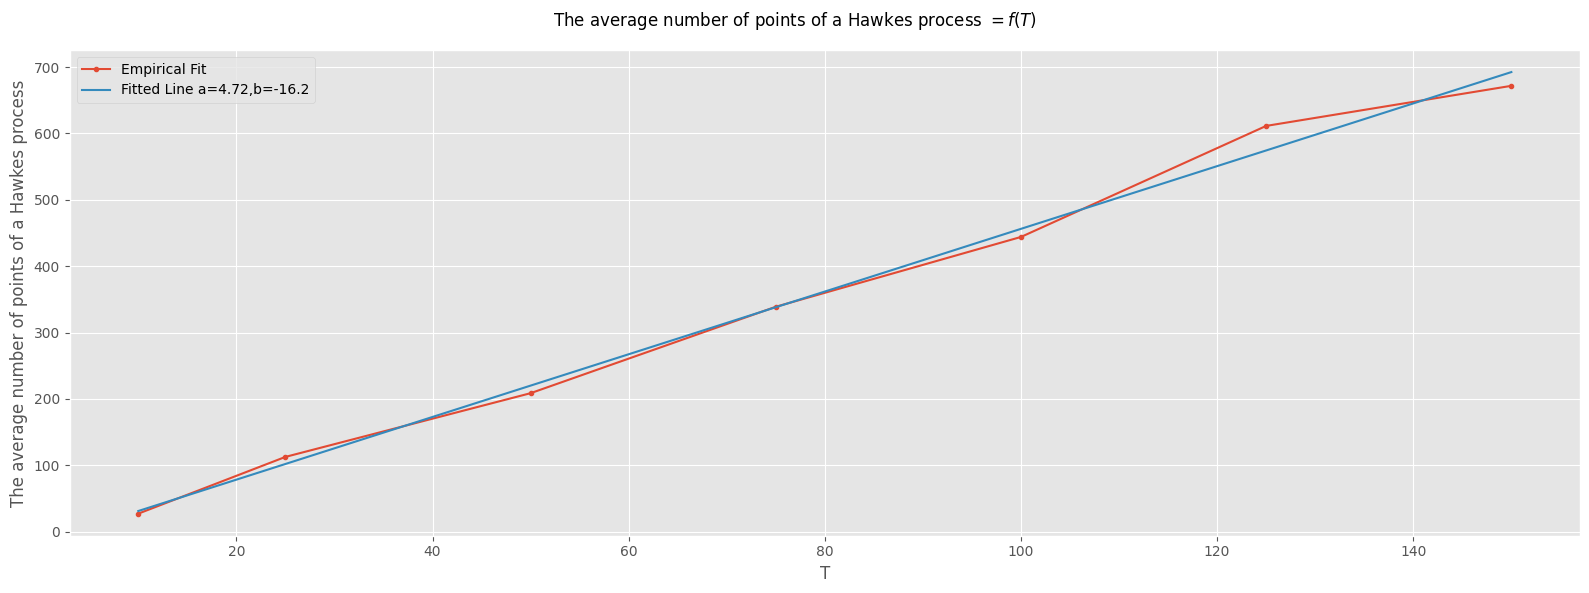

In [12]:
List_T = np.array([10,25,50,75,100,125,150])
N = 10 #Number of simulatrion per time step
Average_number_of_points = []
for T in List_T:
    n = 0
    for _ in range(N):
        kernel_function = lambda t: exponential_kernal(t,alphas=[3/4],betas=[0.8])
        jump_times = simulate_hawkes_process_with_branching(mu,kernel_function,T)
        n += len(jump_times)
    Average_number_of_points.append(n/N)
Average_number_of_points = np.array(Average_number_of_points)

slope, intercept, r_value, p_value, std_err = linregress(List_T, Average_number_of_points)
y_fit = intercept + slope * List_T

fig, ax = plt.subplots(figsize=(16,6))
fig.suptitle(r'The average number of points of a Hawkes process $=f(T)$')

ax.plot(List_T, Average_number_of_points, marker='.', label='Empirical Fit')
ax.plot(List_T, y_fit, label=f'Fitted Line a={slope:.2f},b={intercept:.1f}')
ax.set_xlabel(r'T')
ax.set_ylabel(r'The average number of points of a Hawkes process')
ax.legend()

plt.tight_layout()
plt.show()

#### 5. Computational time

Choose some values to define a stable Hawkes process with a single exponential kernel. Compare the average time needed for the simulation of one realization on [0,T] using your own thinning code, your own branching code, and using the external library, as a function of T. Comment.

In [13]:
alpha = 0.975
q = norm.ppf(alpha, loc=0, scale=1)
n=100
# Range of T values
T_values = [10,20,30,40,50,60]
mean = {'Branching':[],'No Branching':[],'Hawkes':[]}
max  = {'Branching':[],'No Branching':[],'Hawkes':[]}
min  = {'Branching':[],'No Branching':[],'Hawkes':[]}

kernel_function = lambda t: exponential_kernal(t,alphas=[3/4],betas=[0.8])

model = hk.simulator()
model.set_kernel('exp')
model.set_baseline('const')
para = {'mu':1.2, 'alpha':0.6, 'beta':0.8}
model.set_parameter(para)

for T_0 in T_values:
    simulation_function_1 = lambda T: simulate_hawkes_process_with_branching(mu,kernel_function,T)
    simulation_function_2 = lambda T: simulate_hawkes_process(mu,kernel_function,T)
    simulation_function_3 = lambda T: simulate_hawkes(model,T)
    avg_time_func_1 = average_time_for_T(simulation_function_1, Number_simulation=n,T=T_0)
    avg_time_func_2 = average_time_for_T(simulation_function_2, Number_simulation=n,T=T_0)
    avg_time_func_3 = average_time_for_T(simulation_function_3, Number_simulation=n,T=T_0)
    mean['Branching'].append(avg_time_func_1[0])
    max['Branching'].append(avg_time_func_1[0] + q*np.sqrt(avg_time_func_1[1]/n))
    min['Branching'].append(avg_time_func_1[0] - q*np.sqrt(avg_time_func_1[1]/n))
    mean['No Branching'].append(avg_time_func_2[0])
    max['No Branching'].append(avg_time_func_2[0] + q*np.sqrt(avg_time_func_2[1]/n))
    min['No Branching'].append(avg_time_func_2[0] - q*np.sqrt(avg_time_func_2[1]/n))
    mean['Hawkes'].append(avg_time_func_3[0])
    max['Hawkes'].append(avg_time_func_3[0] + q*np.sqrt(avg_time_func_3[1]/n))
    min['Hawkes'].append(avg_time_func_3[0] - q*np.sqrt(avg_time_func_3[1]/n))


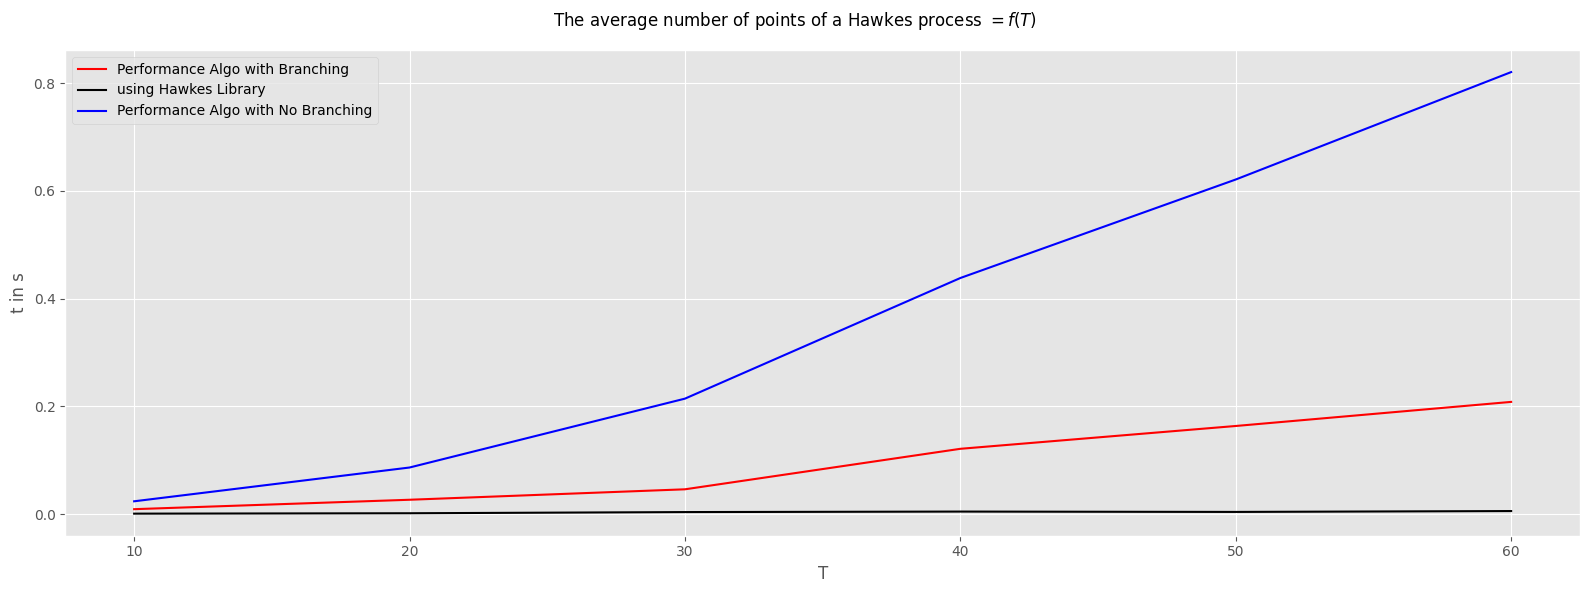

In [16]:
fig, ax = plt.subplots(figsize=(16,6))
fig.suptitle(r'The average number of points of a Hawkes process $=f(T)$')

ax.plot(T_values, mean['Branching']   ,color='r',label='Performance Algo with Branching')
#ax.plot(T_values, max['Branching']   ,color='r',linestyle='--',linewidth=1)
#ax.plot(T_values, min['Branching']   ,color='r',linestyle='--',linewidth=1)
ax.plot(T_values, mean['Hawkes']  ,color='black',label='using Hawkes Library')
#ax.plot(T_values, max['Hawkes']   ,color='black',linestyle='--',linewidth=1)
#ax.plot(T_values, min['Hawkes']   ,color='black',linestyle='--',linewidth=1)
ax.plot(T_values, mean['No Branching'],color='b',label='Performance Algo with No Branching')
#ax.plot(T_values, max['No Branching'] ,color='b',linestyle='--',linewidth=1)
#ax.plot(T_values, min['No Branching'] ,color='b',linestyle='--',linewidth=1)
ax.set_xlabel(r'T')
ax.set_ylabel(r't in s')
ax.legend()

plt.tight_layout()
plt.show()